In [15]:
# Import packages.
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
from sympy import symbols, Eq, solve
from sympy import Matrix
import scipy as sp

# Load the .mat file.
# mat_contents=sio.loadmat('./diffIC_eiSTDP_Aug12.mat')
# mat_contents=sio.loadmat('./diffIC_eiSTDP_Aug29.mat')
# mat_contents=sio.loadmat('./diffIC_eiSTDP_Sept19.mat')
# mat_contents=sio.loadmat('./diffIC_eiSTDP_Sept19_corr.mat')
# mat_contents=sio.loadmat('./diffIC_eiSTDP_Oct6.mat')
mat_contents=sio.loadmat('./diffIC_eiSTDP_Oct8.mat')
# mat_contents=sio.loadmat('./diffIC_eiSTDP_Oct6_corr.mat')

In [16]:
alpha_e = mat_contents['alpha_e'].squeeze()
c = mat_contents['c'].squeeze()
dt = mat_contents['dt'].squeeze()
dtRate = mat_contents['dtRate'].squeeze()
eta_ei = mat_contents['eta_ei']
eRateT = mat_contents['eRateT']
iRateT = mat_contents['iRateT']
# Ie_current = mat_contents['Ie_current_Jm']
# Ii_current = mat_contents['Ii_current_Jm']
# Ix_current = mat_contents['Ix_current_Jm']
Jm = mat_contents['Jm']
Jmax_ei = mat_contents['Jmax_ei']
Jxm = mat_contents['Jxm']
mC = mat_contents['mC']
mean_Jei_recorded = mat_contents['mean_Jei_recorded']
mR = mat_contents['mR']
mV = mat_contents['mV']
P = mat_contents['P']
N = mat_contents['N'].squeeze()
Ne = mat_contents['Ne'].squeeze()
Ni = mat_contents['Ni'].squeeze()
R_e_sims = mat_contents['R_e_sims'].T
R_i_sims = mat_contents['R_i_sims'].T
R_e_theory = mat_contents['R_e_theory']
R_i_theory = mat_contents['R_i_theory']
reMean = mat_contents['reMean']
riMean = mat_contents['riMean']
rx = mat_contents['rx'].squeeze()
seed = mat_contents['seed'].squeeze()
T = mat_contents['T'].squeeze()
T1 = mat_contents['T1'].squeeze()
T2 = mat_contents['T2'].squeeze()
tauSTDP = mat_contents['tauSTDP'].squeeze()
W = mat_contents['W']
winsize = mat_contents['winsize'].squeeze()
Wx = mat_contents['Wx']

Jm_ei_iSTDP_vector = mat_contents['Jm_ei_iSTDP_vector'].squeeze() * np.sqrt(N)

time_axis = np.linspace(0,T/1000,len(mean_Jei_recorded[0,:]))

In [17]:
# Some details of this simulation:
print('N =',N)
print('eta_ei =',eta_ei*Jmax_ei)
print('c =',c)

N = 15000
eta_ei = [[0.0002]]
c = 0


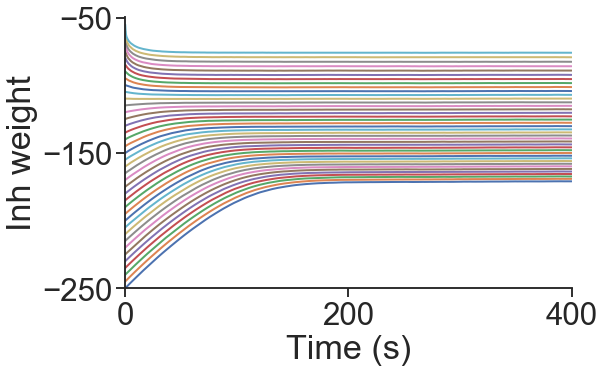

In [212]:
# Plot mean EE weight over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":2})

for i in range(len(mean_Jei_recorded[:,0])):
    plt.plot(time_axis,mean_Jei_recorded[i,:])
# i=3
# plt.plot(time_axis,mean_Jei_recorded[i,:])
    
# print(Jm_ei_iSTDP_vector)
    
# plt.axhline(y=Jmax_ee_soft*np.sqrt(N),color='k')

plt.xlabel(r'Time (s)')
plt.ylabel(r'Inh weight')

plt.yticks((-250,-150,-50))
plt.xticks((0,T/1000/2,T/1000))

plt.xlim((-20,T/1000+20))
plt.ylim((-250,-49))

# plt.ylim((-120,-100))

plt.xlim((0,T/1000))
# plt.ylim((-180,-50))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig7-istdp-analysis/weight_evolution_diff_ic.pdf", bbox_inches="tight")


In [124]:
from scipy.optimize import curve_fit
def exponential(x, a, b):
    return a*np.exp(b*x)

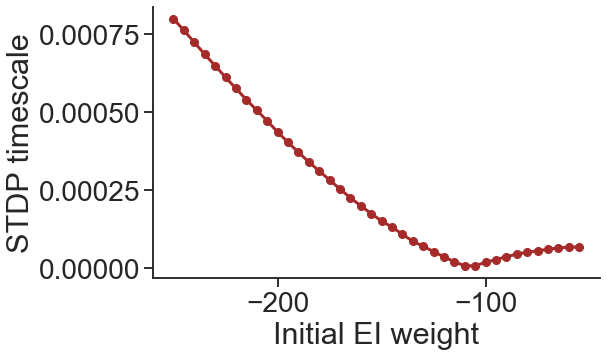

In [125]:
# Plot mean EE weight over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":2.3})


timescales = np.zeros(len(Jm_ei_iSTDP_vector))

for i in range(len(mean_Jei_recorded[:,0])):
#     temp = np.polyfit(time_axis, np.log(np.abs(mean_Jei_recorded[i,:])), 1) # First argument is slope (time const), second is intercept
    if i < len(Jm_ei_iSTDP_vector):
        temp,cov = curve_fit(f=exponential, xdata=time_axis, ydata=np.abs(mean_Jei_recorded[i,:]), p0=[0, 0], bounds=(-np.inf, np.inf))
    
#     else: 
#         temp = np.polyfit(time_axis, np.log(mean_Jei_recorded[i,:]+250), 1) # First argument is slope (time const), second is intercept
    timescales[i] = np.abs(temp[1])
    stdevs = np.sqrt(np.diag(cov))[1]
#     print(temp[1],'+/-',stdevs)

#     indx = np.min(np.where(np.abs(derivative[i,:])<10e-9))
#     timescales[i] = indx / dt / (1/eta_ei/Jmax_ei) # Number of time constants to convergence

plt.plot(Jm_ei_iSTDP_vector,timescales, linewidth=3,color='brown',
         marker='o',markersize=8)

plt.xlabel(r'Initial EI weight')
plt.ylabel(r'STDP timescale')

# plt.xticks((-250,-150,-50))
# plt.yticks((0,40,80))

# plt.ylim((-1,2000))
# plt.xlim((-255,-120))

sns.despine()
plt.show()

# fig.savefig("./PlotsReview_BNs/Fig7-istdp-analysis/eta_to_conv_diff_ic.pdf", bbox_inches="tight")


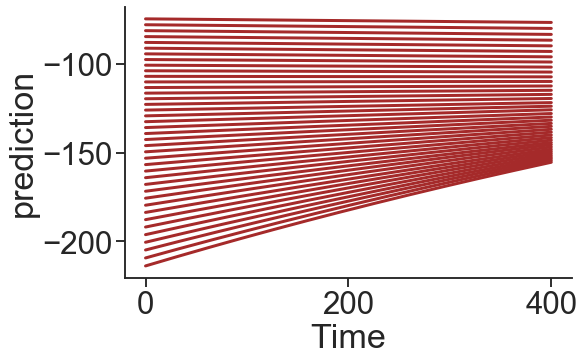

In [77]:
# Plot mean EE weight over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":2.3})


timescales = np.zeros(len(Jm_ei_iSTDP_vector))

for i in range(len(mean_Jei_recorded[:,0])):
#     temp = np.polyfit(time_axis, np.log(np.abs(mean_Jei_recorded[i,:])), 1) # First argument is slope (time const), second is intercept
    if i < len(Jm_ei_iSTDP_vector):
        temp,cov = curve_fit(f=exponential, xdata=time_axis, ydata=np.abs(mean_Jei_recorded[i,:]), p0=[0, 0], bounds=(-np.inf, np.inf))
    
#     else: 
#         temp = np.polyfit(time_axis, np.log(mean_Jei_recorded[i,:]+250), 1) # First argument is slope (time const), second is intercept
    timescales[i] = np.abs(temp[1])
    stdevs = np.sqrt(np.diag(cov))[1]
#     print(temp[1],'+/-',stdevs)

#     indx = np.min(np.where(np.abs(derivative[i,:])<10e-9))
#     timescales[i] = indx / dt / (1/eta_ei/Jmax_ei) # Number of time constants to convergence

    plt.plot(time_axis,-exponential(time_axis,*temp), linewidth=3,color='brown')

plt.xlabel(r'Time')
plt.ylabel(r'prediction')

# plt.xticks((-250,-150,-50))
# plt.yticks((0,40,80))

# plt.ylim((-1,2000))
# plt.xlim((-255,-120))

sns.despine()
plt.show()

# fig.savefig("./PlotsReview_BNs/Fig7-istdp-analysis/eta_to_conv_diff_ic.pdf", bbox_inches="tight")


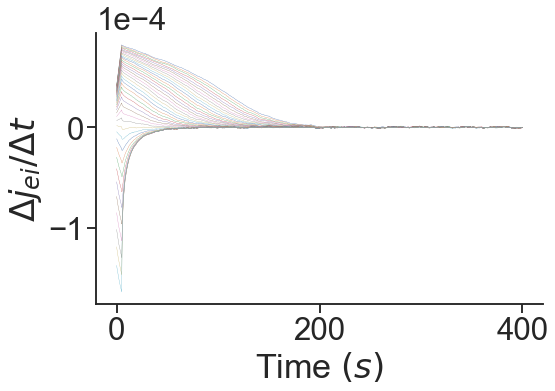

In [120]:
# Plot mean EE weight over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":2.3})

derivative = np.zeros_like(mean_Jei_recorded)
deltaT = T/dt / len(mean_Jei_recorded[0,:]) # millisec
window_size = 1000 # len(mean_Jei_recorded[0,:])
window_conv = np.ones((1,window_size)) / window_size
window_conv = window_conv.squeeze()
convolved_derivative = np.zeros((len(mean_Jei_recorded[:,0]),
                                 len(mean_Jei_recorded[0,:])))

for i in range(len(mean_Jei_recorded[:,0])): # For each IC
    for j in range(len(mean_Jei_recorded[0,:])-1): # For each time step
        derivative[i,j] = (mean_Jei_recorded[i,j+1] - mean_Jei_recorded[i,j])/deltaT
    derivative[i,:] = np.convolve(derivative[i,:],window_conv,mode='same')

# for i in range(len(mean_Jei_recorded[:,0])):
#     plt.plot(time_axis,np.abs(derivative[i,:]),linewidth=.05)
    
for i in range(len(mean_Jei_recorded[:,0])):
    plt.plot(time_axis,derivative[i,:],linewidth=.3)

# i=0
# plt.plot(time_axis,derivative[i,:],linewidth=1.05)
# i=34
# plt.plot(time_axis,derivative[i,:],linewidth=1.05)

plt.xlabel(r'Time $(s)$')
plt.ylabel(r'$\Delta j_{ei}/\Delta t$')

# plt.yticks((-250,-150,-50))
plt.xticks((0,T/1000/2,T/1000))
plt.xlim((-20,T/1000+20))

# plt.yticks((-10e-5,-5*10e-6,0,3*10e-6))
# plt.ylim((-3*10e-6,3*10e-6))
# plt.yticks((-3*10e-6,0,3*10e-6))

plt.ticklabel_format(style='sci',scilimits=(-1,1),axis='y')

sns.despine()
plt.show()

# fig.savefig("./PlotsReview_BNs/Fig7-istdp-analysis/dJeidt_evolution_diff_ic.pdf", bbox_inches="tight")


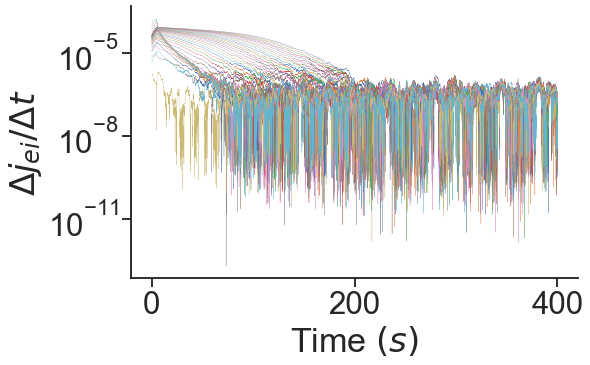

In [121]:
# Plot mean EE weight over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":2.3})

derivative = np.zeros_like(mean_Jei_recorded)
deltaT = T/dt / len(mean_Jei_recorded[0,:]) # millisec
window_size = 1000 # len(mean_Jei_recorded[0,:])
window_conv = np.ones((1,window_size)) / window_size
window_conv = window_conv.squeeze()
convolved_derivative = np.zeros((len(mean_Jei_recorded[:,0]),
                                 len(mean_Jei_recorded[0,:])))

for i in range(len(mean_Jei_recorded[:,0])): # For each IC
    for j in range(len(mean_Jei_recorded[0,:])-1): # For each time step
        derivative[i,j] = (mean_Jei_recorded[i,j+1] - mean_Jei_recorded[i,j])/deltaT
    derivative[i,:] = np.convolve(derivative[i,:],window_conv,mode='same')

# for i in range(len(mean_Jei_recorded[:,0])):
#     plt.plot(time_axis,np.abs(derivative[i,:]),linewidth=.05)
    
for i in range(len(mean_Jei_recorded[:,0])):
    plt.plot(time_axis,np.abs(derivative[i,:]),linewidth=.3)

# i=0
# plt.plot(time_axis,derivative[i,:],linewidth=1.05)
# i=34
# plt.plot(time_axis,derivative[i,:],linewidth=1.05)

plt.xlabel(r'Time $(s)$')
plt.ylabel(r'$\Delta j_{ei}/\Delta t$')

# plt.yticks((-250,-150,-50))
plt.xticks((0,T/1000/2,T/1000))
plt.xlim((-20,T/1000+20))

# plt.yticks((-10e-5,-5*10e-6,0,3*10e-6))
# plt.ylim((-3*10e-6,3*10e-6))
# plt.yticks((-3*10e-6,0,3*10e-6))

plt.ticklabel_format(style='sci',scilimits=(-1,1),axis='y')

plt.yscale('log')

sns.despine()
plt.show()

# fig.savefig("./PlotsReview_BNs/Fig7-istdp-analysis/dJeidt_evolution_diff_ic.pdf", bbox_inches="tight")


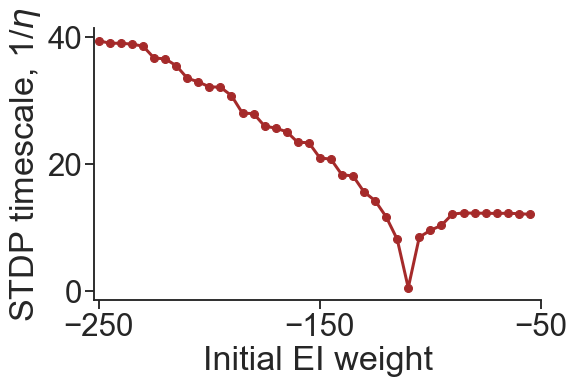

In [206]:
# Plot mean EE weight over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":2.3})


timescales = np.zeros(len(Jm_ei_iSTDP_vector))

for i in range(len(mean_Jei_recorded[:,0])):
    tol = 10e-7 #np.abs(derivative[i,0]) / 5
    indx = np.min(np.where(np.abs(derivative[i,:])<tol))
    timescales[i] = indx *0.01*1000 / (1/eta_ei/Jmax_ei) # Number of time constants to convergence

plt.plot(Jm_ei_iSTDP_vector,timescales, linewidth=3,color='brown',
         marker='o',markersize=8)

plt.xlabel(r'Initial EI weight')
plt.ylabel(r'STDP timescale, 1/$\eta$')

plt.xticks((-250,-150,-50))
# plt.yticks((0,40,80))

# plt.ylim((-1,4000))
plt.xlim((-252,-50))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig7-istdp-analysis/eta_to_conv_diff_ic.pdf", bbox_inches="tight")


In [14]:
## Symbolic computation of the theoretical fixed point of the system for a set of different initial conditions.

pex = 0.1; qx = 0.2;  qi = 0.2; qe = 0.8; pix = 0.1;
pee = 0.1; pei = 0.1; pie = 0.1; pii = 0.1; jex = 180;
jix = 135; jee = 25; jie = 112.5; jii = -250; jei=-150;
taux = 10; taue = 8; taui = 4; tauc = 5; rx = 10/1000; tauSTDP = 200;
wex = pex*qx*jex
wee = pee*qe*jee 
wix = pex*qi*jix 
wei = pei*qi*jei 
wie = pie*qe*jie 
wii = pii*qi*jii

W = np.array(([wee, wei], [wie, wii])).reshape((2,2))
Wx = np.array([wex, wix]).reshape((2,1))

Diff_E = R_e_sims - R_e_theory
Diff_I = R_i_sims - R_i_theory

time = 1500000 # T/dt
j_ei = np.zeros((time,1))
i=10
j_ei[0,0] = Jm_ei_iSTDP_vector[i]
for t in range(time-1):
    wei = pei*qi*j_ei[t,0]
    W = np.array(([wee, wei], [wie, wii])).reshape((2,2))
    Correction = np.array(([Diff_E[i,0]/np.sqrt(N), Diff_I[i,0]/np.sqrt(N)])).reshape((2,1))
    r = - np.linalg.inv(W) @ (Wx * rx + Correction)
    r_e = r[0,0]
    r_i = r[1,0]
    dj_ei = - j_ei[t]/(Jmax_ei*np.sqrt(N)) * eta_ei*Jmax_ei * (2*tauSTDP*r_e - alpha_e) *r_i
    j_ei[t+1] = j_ei[t] + 500*0.1 * dj_ei
    if(t % (time/5) == 0):
        print(t/time)



0.0
0.2
0.4
0.6
0.8


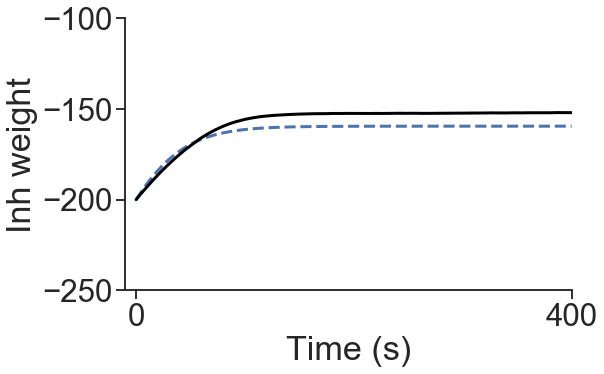

In [20]:
# Plot mean EI weight over time 
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":2.3})

plt.plot(np.linspace(0,400,len(j_ei)),j_ei,linewidth=3, linestyle='--')

plt.plot(np.linspace(0,400,len(mean_Jei_recorded[i,:])),
         mean_Jei_recorded[i,:],color='black',linewidth=3,label='mean')

plt.ylim(-250,-100)
plt.xlim(-10,400)

plt.xticks((0,400))

plt.xlabel('Time (s)')
plt.ylabel('Inh weight')

sns.despine()

plt.show()

# fig.savefig("./PlotsReview_BNs/Fig11-transient-dynamics/iSTDP_transient_weights.pdf", bbox_inches="tight")



In [6]:
len(mean_Jei_recorded[0,:])

150000

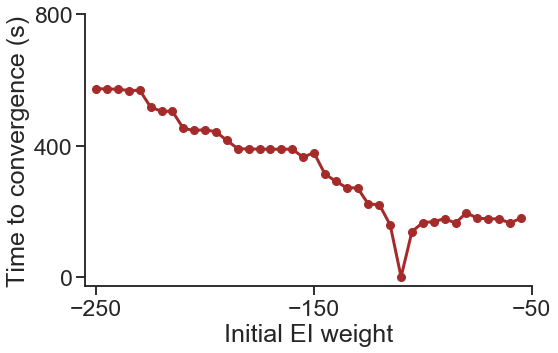

In [9]:
# Plot mean EE weight over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})


timescales = np.zeros(len(Jm_ei_iSTDP_vector))

for i in range(len(mean_Jei_recorded[:,0])):
    indx = np.min(np.where(np.abs(derivative[i,:])<10e-9))
    timescales[i] = indx / dt / 1000 # in sec

    
plt.plot(Jm_ei_iSTDP_vector,timescales, linewidth=3,color='brown',
         marker='o',markersize=8)

plt.xlabel(r'Initial EI weight')
plt.ylabel(r'Time to convergence (s)')

plt.xticks((-250,-150,-50))
plt.yticks((0,400,800))

plt.xlim((0,800))
plt.xlim((-255,-50))

# plt.xlim((1000,2000))

sns.despine()
plt.show()

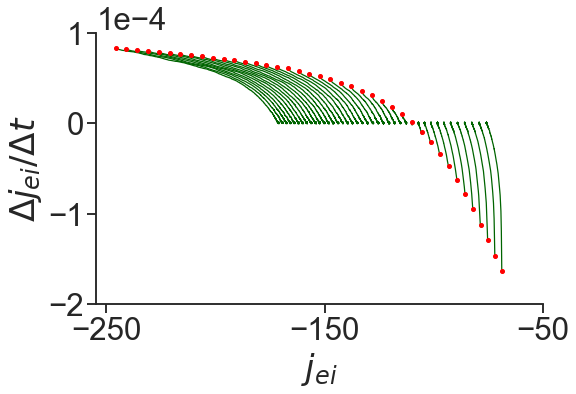

In [207]:
# Plot mean EE weight over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":2.3})

for i in range(len(mean_Jei_recorded[:,0])):
    plt.plot(mean_Jei_recorded[i,500:],derivative[i,500:],linewidth=1.25,color='darkgreen')
    plt.plot(mean_Jei_recorded[i,500],derivative[i,500], marker='o'
            ,markersize=4,color='red')
# i=5
# plt.plot(mean_Jei_recorded[i,:],derivative[i,:],linewidth=0.05)
# i=35
# plt.plot(mean_Jei_recorded[i,:],derivative[i,:],linewidth=0.05)

plt.xlabel(r'$j_{ei}$')
plt.ylabel(r'$\Delta j_{ei}/\Delta t$')

plt.xticks((-250,-150,-50))
plt.yticks((-2*10e-5,-10e-5,0,1*10e-5))

# plt.xlim((-20,T/1000+20))
plt.ylim((-2*10e-5,10e-5))

# plt.xlim((1000,2000))
# plt.ylim((-180,-50))

plt.ticklabel_format(style='sci',scilimits=(-1,1),axis='y')

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig7-istdp-analysis/dJeidt_vs_jei_diff_ic.pdf", bbox_inches="tight")



In [171]:
# R_e_theory = R_e_theory + Wx[0,0] * rx * np.sqrt(N) 
# R_i_theory = R_i_theory + Wx[1,0] * rx * np.sqrt(N) 

In [172]:
## Symbolic computation of the theoretical fixed point of the system for a set of different initial conditions.

jei = symbols('jei')
pex = 0.1; qx = 0.2;  qi = 0.2; qe = 0.8; pix=0.1;
pee = 0.1; pei = 0.1; pie = 0.1; pii = 0.1; jex = 180;
jix = 135; jee = 25; jie = 112.5; jii = -250;
taux = 10; taue = 8; taui = 4; tauc = 5; rx = 10/1000; tauSTDP = 200; alpha=4;
wex = pex*qx*jex
wee = pee*qe*jee 
wix = pex*qi*jix 
wei = pei*qi*jei 
wie = pie*qe*jie 
wii = pii*qi*jii

W = Matrix(([wee, wei], [wie, wii]))
Wx = np.array([wex, wix]).reshape((2,1))

Diff_E = R_e_sims - R_e_theory
Diff_I = R_i_sims - R_i_theory
soln = np.zeros((len(Jm_ei_iSTDP_vector),1))

for i in range(len(Jm_ei_iSTDP_vector)):
    Correction = np.array(([Diff_E[i,0]/np.sqrt(N), Diff_I[i,0]/np.sqrt(N)])).reshape((2,1))
    r = -W.inv() @ (Wx * rx + Correction)
    eq1 = Eq( (2*tauSTDP*r[0,0] - alpha) )
    soln[i,0] = solve(eq1,jei)[0]



/opt/anaconda3/envs/bmnn/lib/python3.7/site-packages/sympy/core/relational.py:470: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  deprecated_since_version="1.5"


In [173]:
soln[27,0]

-121.65989567678143

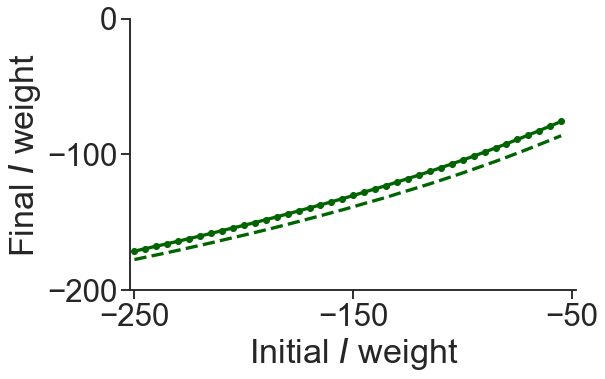

In [208]:
## PLot theoretical and empirical fixed points for a set of different initial conditions 
# on the same network with Vogels I->E rule.

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":3.3})

plt.plot(Jm_ei_iSTDP_vector, soln,  color='darkgreen',
        linestyle='--')
plt.plot(Jm_ei_iSTDP_vector,np.mean(mean_Jei_recorded[:,len(mean_Jei_recorded[0,:])//2:-1],axis=1),color='darkgreen', 
         markersize=6, marker='o')

plt.xlabel(r'Initial $I$ weight')
plt.ylabel(r'Final $I$ weight')

plt.xticks((-250,-150,-50))
plt.yticks((-200,-100,0))
plt.xlim(-252,-48)
plt.ylim((-200,0))

# leg = plt.legend(loc='upper left',fontsize=25,frameon='none',markerscale=1)
# leg.get_frame().set_linewidth(0.0)
# Change linewidth of legends.
#for legobj in leg.legendHandles:
#    legobj.set_linewidth(4.0)

sns.despine()

fig.savefig("./PlotsReview_BNs/Fig7-istdp-analysis/JeiFPvsJeiIC.pdf", bbox_inches="tight")


plt.show()

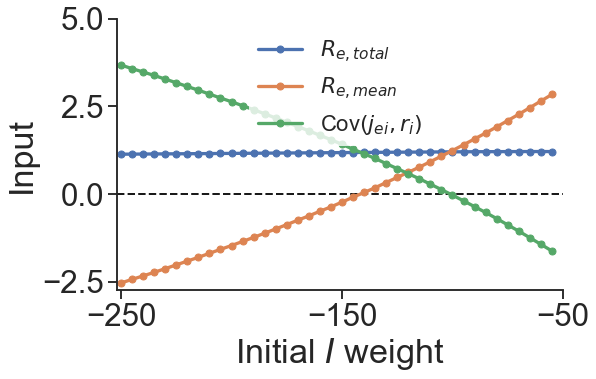

In [209]:
## Same as above but the difference between the two.

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":3.3})

plt.axhline(y=0,color='k',linewidth=2,linestyle='--')

plt.plot(Jm_ei_iSTDP_vector,R_e_sims + R_i_sims,
         label="$R_{e,total}$", marker='o',markersize=7)

plt.plot(Jm_ei_iSTDP_vector,R_e_theory+R_i_theory,
         label="$R_{e,mean}$",marker='o',markersize=7)

plt.plot(Jm_ei_iSTDP_vector,R_e_sims+R_i_sims
         - R_e_theory - R_i_theory,
         label="Cov$(j_{ei},r_i)$",marker='o',markersize=7)

plt.xlabel('Initial $I$ weight')
plt.ylabel('Input')

plt.xticks((-250,-150,-50))
plt.yticks((-2.5,0,2.5,5))
plt.xlim(-252,-50)
plt.ylim((-2.75,5))

leg = plt.legend(loc='upper center',fontsize=22,frameon='none',markerscale=1)
leg.get_frame().set_linewidth(0.0)


sns.despine()


fig.savefig("./PlotsReview_BNs/Fig7-istdp-analysis/RvsJei.pdf", bbox_inches="tight")

plt.show()

NameError: name 'Ie_current' is not defined

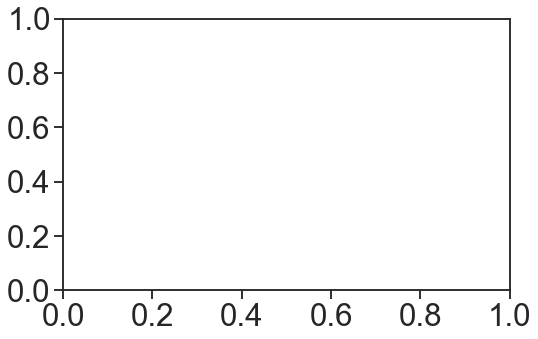

In [17]:
# Plot mean input over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":0.23})

# for i in range(len(Ie_current[:,0])-5):
#     plt.plot(time_axis,Ie_current[i,:],color='blue')
#     plt.plot(time_axis,Ii_current[i,:],color='red')
#     plt.plot(time_axis,Ie_current[i,:]+Ii_current[i,:]+Ix_current[i,:],color='k')
    
i=1
plt.plot(time_axis,Ie_current[i,:],color='blue')
plt.plot(time_axis,Ii_current[i,:],color='red')
plt.plot(time_axis,Ie_current[i,:]+Ii_current[i,:]+Ix_current[i,:],color='k')

plt.xlabel(r'Time $(s)$')
plt.ylabel(r'Currents')

sns.despine()
plt.show()


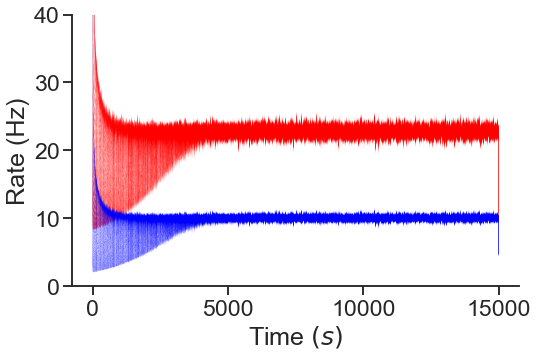

In [18]:
# Plot mean input over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":.03})

# for i in range(len(Ie_current[:,0])-8):
#     plt.plot(1000*eRateT[i,:],color='blue')
#     plt.plot(1000*iRateT[i,:],color='red')
    
i=1
for i in range(len(Jm_ei_iSTDP_vector)):
    
    plt.plot(1000*eRateT[i,:],color='blue')
    plt.plot(1000*iRateT[i,:],color='red')
    
plt.xlabel(r'Time $(s)$')
plt.ylabel(r'Rate (Hz)')

plt.ylim((0,40))

sns.despine()
plt.show()
